Reading Dataset Files

In [3]:
import pandas as pd

# Read the three datasets
restaurants_df = pd.read_csv('restaurants_train.csv')
laptops_df = pd.read_csv('laptops_train.csv')
apex_df = pd.read_csv('apex_train.csv')
canon_df = pd.read_csv('canon_train.csv')
creative_df = pd.read_csv('creative_train.csv')
nikon_df = pd.read_csv('nikon_train.csv')
nokia_df = pd.read_csv('nokia_train.csv')

restaurants_df['Tokens'] = restaurants_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
laptops_df['Tokens'] = laptops_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
apex_df['Tokens'] = apex_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
canon_df['Tokens'] = canon_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
creative_df['Tokens'] = creative_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
nikon_df['Tokens'] = nikon_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)
nokia_df['Tokens'] = nokia_df['Tokens'].str.replace(r"['\[\],]", '', regex=True)

# Add 'ID' column to each DataFrame
restaurants_df['domain'] = 'restaurants'
laptops_df['domain'] = 'laptops'
apex_df['domain'] = 'apex'
canon_df['domain'] = 'canon'
creative_df['domain'] = 'creative'
nikon_df['domain'] = 'nikon'
nokia_df['domain'] = 'nokia'

# Select only the 'ID' and 'Tokens' columns
restaurants_df = restaurants_df[['domain', 'Tokens']]
laptops_df = laptops_df[['domain', 'Tokens']]
apex_df = apex_df[['domain', 'Tokens']]
canon_df = canon_df[['domain', 'Tokens']]
creative_df = creative_df[['domain', 'Tokens']]
nikon_df = nikon_df[['domain', 'Tokens']]
nokia_df = nokia_df[['domain', 'Tokens']]

# Rename the 'Tokens' column to 'sentence' in each DataFrame
restaurants_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
laptops_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
apex_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
canon_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
creative_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
nikon_df.rename(columns={'Tokens': 'sentence'}, inplace=True)
nokia_df.rename(columns={'Tokens': 'sentence'}, inplace=True)

# Concatenate the three DataFrames into a single DataFrame
combined_df = pd.concat([restaurants_df, laptops_df, apex_df, canon_df, creative_df, nikon_df, nokia_df], ignore_index=True)

# Remove rows with the same sentence entries
combined_df = combined_df.drop_duplicates(subset=['sentence'])

combined_df.to_csv('dataset.csv')
# Print the combined DataFrame
print(combined_df)


PermissionError: [Errno 13] Permission denied: 'dataset.csv'

Feature Wieghting

In [ ]:
#library
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to remove stopwords and punctuation
def remove_stopwords_punctuation(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(filtered_tokens)


In [ ]:
#libraries
from collections import defaultdict, Counter
import math


# Function to create a pattern co-occurrence matrix
def create_co_occurrence_matrix(combined_nouns, window_size=5):
    co_occurrence_matrix = defaultdict(lambda: defaultdict(int))
    for i in range(len(combined_nouns)):
        target_word = combined_nouns[i]
        start_index = max(0, i - window_size)
        end_index = min(len(combined_nouns), i + window_size + 1)
        context_words = combined_nouns[start_index:i] + combined_nouns[i + 1:end_index]
        for context_word in context_words:
            co_occurrence_matrix[target_word][context_word] += 1
    return dict(co_occurrence_matrix)

In [ ]:
# Function to calculate TF
def calculate_tf(combined_nouns):
    tf = Counter(combined_nouns)
    total_count = len(combined_nouns)
    for word in tf:
        tf[word] /= total_count
    return tf

In [ ]:
# Function to calculate IDF
def calculate_idf(combined_nouns, documents):
    idf = {}
    total_documents = len(documents)
    word_document_counts = Counter()
    for document in documents:
        words_in_document = set(document)
        word_document_counts.update(words_in_document)
    for word in set(combined_nouns):
        word_document_count = word_document_counts[word]
        idf[word] = math.log(total_documents / (1 + word_document_count))
    return idf

In [ ]:
# Function to calculate TF-IDF
def calculate_tfidf(tf, idf):
    tfidf = {}
    for word in tf:
        tfidf[word] = tf[word] * idf.get(word, 0)
    return tfidf

In [ ]:
# Function to combine PCM and TF-IDF weights
def combine_weights(co_occurrence_matrix, tfidf):
    combined_weights = defaultdict(int)
    for word in tfidf:
        combined_weights[word] += tfidf[word]
    for target_word, context_words in co_occurrence_matrix.items():
        for context_word, count in context_words.items():
            combined_weights[target_word] += count
            combined_weights[context_word] += count
    return combined_weights

In [ ]:
# re-pre-processed data
all_sentences_string = ' '.join(combined_df['sentence'].tolist())
combined_documents = all_sentences_string
nlp.max_length = len(combined_documents) + 100
sentence = remove_stopwords_punctuation(combined_documents)

doc = nlp(sentence)
sentences = list(doc.sents)

nouns = []
noun_phrases = []

# Iterate over sentences to extract nouns and noun_phrases
for sentence in sentences:
    for chunk in sentence.noun_chunks:
        noun_phrases.append(chunk.text)
    for token in sentence:
        if token.pos_ == "NOUN":
            nouns.append(token.text)

combined_nouns = nouns + noun_phrases
combined_nouns

['staff',
 'factor',
 'food',
 'deficiencies',
 'food',
 'kitchen',
 'whip',
 'menu',
 'food',
 'perks',
 'orrechiete',
 'sausage',
 'waiters',
 'half',
 'sample',
 'meats',
 'texture',
 'chewy',
 'food',
 'megadeth',
 'songs',
 'daft',
 'punk',
 'mayonnaise',
 'forgot',
 'toast',
 'ingredients',
 'cheese',
 'omelet',
 'temperatures',
 'bacon',
 'plate',
 'hour',
 'check',
 'sit',
 'drinks',
 'talk',
 'design',
 'atmosphere',
 'expert',
 'cuisine',
 'pizza',
 'pizza',
 'money',
 'decoration',
 'seats',
 'wall',
 'benches',
 'seltzer',
 'lime',
 'ice',
 'people',
 'pickles',
 'selection',
 'meats',
 'seafoods',
 'suggestion',
 'family',
 'style',
 'dishes',
 'vibe',
 'owner',
 'service',
 'concept',
 'delivery',
 'food',
 'atmosphere',
 'service',
 'downtown',
 'neighborhood',
 'spot',
 'food',
 'prices',
 'evening',
 'place',
 'city',
 'prices',
 'wine',
 'price',
 'service',
 'quantity',
 'floor',
 'walk',
 'friends',
 'town',
 'lovers',
 'action',
 'rice',
 'courses',
 'choices',
 'm

In [ ]:
# Create a pattern co-occurrence matrix with a larger window size
co_occurrence_matrix = create_co_occurrence_matrix(combined_nouns, window_size=5)
co_occurrence_matrix

{'staff': defaultdict(int,
             {'factor': 1,
              'food': 45,
              'deficiencies': 1,
              'kitchen': 1,
              'magnificant': 1,
              'branzino': 1,
              'bone': 1,
              'eat': 2,
              'wait': 9,
              'bit': 3,
              'weekends': 1,
              'area': 3,
              'restaurant': 13,
              'workers': 3,
              'lunch': 3,
              'time': 4,
              'service': 24,
              'menu': 10,
              'meal': 7,
              'town': 2,
              'midtown': 1,
              'bagel': 3,
              'wine': 6,
              'deal': 4,
              'hole': 1,
              'help': 1,
              'dinner': 8,
              'place': 22,
              'Dim': 1,
              'turn': 1,
              'points': 1,
              'presentation': 1,
              'style': 1,
              'sum': 1,
              'combination': 1,
              'seafood': 2,
   

In [ ]:
# Convert sentences to a format suitable for IDF calculation
sentences_as_documents = [[token.text for token in nlp(sentence.text)] for sentence in sentences]

# Calculate TF, IDF, and TF-IDF
tf = calculate_tf(combined_nouns)
idf = calculate_idf(combined_nouns, sentences_as_documents)
tfidf = calculate_tfidf(tf, idf)

In [ ]:
# Combine PCM and TF-IDF weights
combined_weights = combine_weights(co_occurrence_matrix, tfidf)
combined_weights

defaultdict(int,
            {'staff': 1410.0040154071598,
             'factor': 192.0010211680496,
             'food': 8852.015827596144,
             'deficiencies': 96.00063081601728,
             'kitchen': 140.00073516504568,
             'whip': 40.00030821653664,
             'menu': 2000.0047937293625,
             'perks': 20.00015410826832,
             'orrechiete': 20.00015410826832,
             'sausage': 20.00015410826832,
             'waiters': 260.0012930206786,
             'half': 380.0013588432208,
             'sample': 80.00050465281382,
             'meats': 40.000283484760246,
             'texture': 40.000283484760246,
             'chewy': 20.00015410826832,
             'megadeth': 40.00030821653664,
             'songs': 1940.0073605887735,
             'daft': 20.00015410826832,
             'punk': 20.00015410826832,
             'mayonnaise': 20.00015410826832,
             'forgot': 80.00042009431182,
             'toast': 40.00025232640691,
         

In [ ]:
combined_df['counts'] = combined_df['sentence'].apply(lambda x: len(x.split()))

In [ ]:
combined_df.head()


,ID,sentence,counts
0,restaurants,But the staff was so horrible to us .,9
1,restaurants,To be completely fair the only redeeming fact...,28
2,restaurants,The food is uniformly exceptional with a very...,29
5,restaurants,Not only was the food outstanding but the lit...,15
7,restaurants,Our agreed favorite is the orrechiete with sau...,32


c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YANSILIYU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x1600 with 0 Axes>

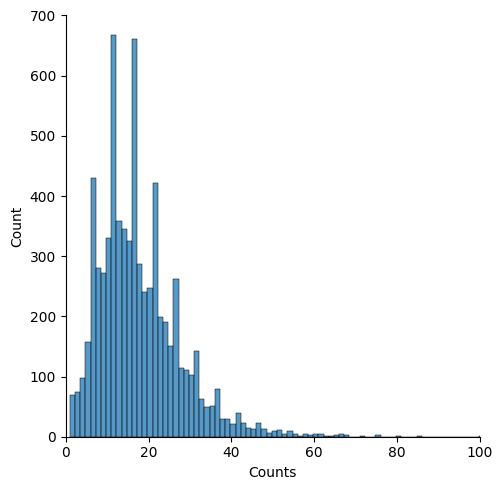

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

sns.displot(combined_df['counts'])
plt.xlim(0, 100)

plt.xlabel('Counts')
plt.show()